In [1]:
import matplotlib.pyplot as plt
import numpy as np
import keras.datasets
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
y_train_orig = y_train
y_test_orig = y_test
x_train = x_train.astype('float') / 255
y_train = to_categorical(y_train)
x_test = x_test.astype('float') / 255
y_test = to_categorical(y_test)

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


In [2]:
in_layer = x = Input(shape=(28, 28))
x = Flatten()(x)
x = Dense(10, activation='softmax', kernel_regularizer=l2(0.0001), name='dense1')(x)

model = Model(inputs=in_layer, outputs=x)
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

W0811 18:19:11.773847 140161984477056 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [3]:
history = model.fit(
    x=x_train,
    y=y_train,
    epochs=5,
    batch_size=100,
    validation_data=(x_test, y_test),
    verbose=2
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 - 3s - loss: 0.6354 - acc: 0.8413 - val_loss: 0.3706 - val_acc: 0.9048
Epoch 2/5
60000/60000 - 2s - loss: 0.3574 - acc: 0.9054 - val_loss: 0.3232 - val_acc: 0.9155
Epoch 3/5
60000/60000 - 2s - loss: 0.3250 - acc: 0.9142 - val_loss: 0.3057 - val_acc: 0.9180
Epoch 4/5
60000/60000 - 2s - loss: 0.3113 - acc: 0.9176 - val_loss: 0.2986 - val_acc: 0.9213
Epoch 5/5
60000/60000 - 2s - loss: 0.3036 - acc: 0.9205 - val_loss: 0.2926 - val_acc: 0.9222


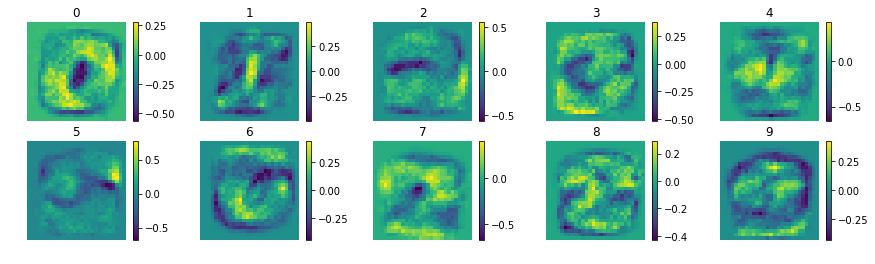

In [4]:
weights, bias = model.get_layer('dense1').get_weights()

plt.figure(figsize=(15, 4))
for n, w_i in enumerate(np.rollaxis(weights, 1, 0).reshape(10, 28, 28)):
    plt.subplot(2, 5, n + 1)
    plt.imshow(w_i)
    plt.axis('off')
    plt.title(n)
    plt.colorbar()


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[2 2 2 2 2 2 2 2 2 2 2 4 2 2 9 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[3 3 8 3 3 3 3 3 3 3 3 8 3 3 3 3 3 5 3 3 3 8 3 3 3 3 3 3 3 3]
[4 4 1 4 4 4 4 4 4 4 4 4 4 4 4 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
[3 5 3 5 5 3 6 5 5 5 5 5 6 3 5 5 6 5 5 3 5 5 5 5 5 5 5 9 5 5]
[3 2 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 0 6 6 6]
[7 7 7 7 7 2 7 7 7 7 7 7 7 7 7 7 7 7 7 4 7 7 7 7 9 7 7 7 7 7]
[8 8 1 5 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 5 8 8 8 8 8 8 8 8 3]
[9 9 9 9 4 9 9 9 9 9 9 4 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 3 9 9]


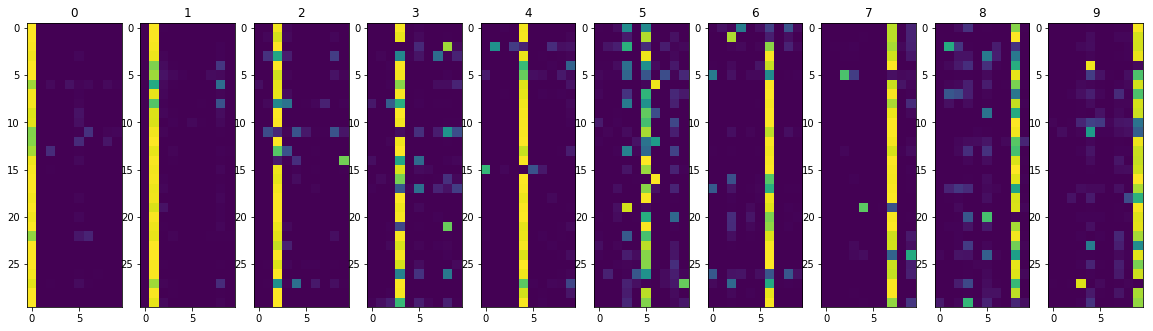

In [5]:
def softmax(n):
    return np.exp(n) / np.sum(np.exp(n), axis=1, keepdims=True)

# get list of test samples sorted by label
sorted_samples = np.argsort(y_test_orig)
x = x_test[sorted_samples]
y = y_test[sorted_samples]
x = x.reshape(x.shape[0], 28 * 28)

# get indices where labels change
label_starts = np.concatenate(
    (
        [[0]],
        np.argwhere(
            y_test_orig[sorted_samples][1:]
            !=
            y_test_orig[sorted_samples][:-1]
        ) + 1
    )
).flatten()

# run forward pass manually
plt.figure(figsize=(20, 7))
for n, ls in enumerate(label_starts):
    x_batch = x[ls:ls + 30]
    z = softmax(x_batch @ weights + bias)
    plt.subplot(1, 10, n + 1)
    plt.title(n)
    plt.imshow(z)
    print(np.argmax(z, axis=1))
